student #:11356590

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("PimaDiabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
print(data.columns.to_list())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome']


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,3.844000,120.737333,68.982667,20.489333,80.378667,31.959067,0.473544,33.166667,0.346667
std,3.370085,32.019671,19.508814,15.918828,115.019198,7.927399,0.332119,11.708872,0.476226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.750000,36.575000,0.628500,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The indicators 'Glucose,' 'BloodPressure,' 'SkinThickness,' 'Insulin,' and 'BMI' must not be zero, which leads me to suspect that this dataset has been filled with zeros to handle missing data.

In [8]:
# function to fill in missing data
def fill_in_missing_value(data, col_name):
    
    # Create a boolean mask to identify missing values in the specified column
    missing_value = (data[col_name] == 0)
    # Create a boolean mask to identify positive outcome cases
    positive = (data['Outcome'] == 1)
    # Create a boolean mask to identify negative outcome cases
    negative = (data['Outcome'] == 0)
    
    # Find the indices of missing values where outcome is positive 
    o_index = data[positive & missing_value].index
    # Find the indices of missing values where outcome is negative 
    x_index = data[negative & missing_value].index
    
    # Calculate the mean of positive outcome cases
    o_mean = data.loc[positive, col_name].mean()
    # Calculate the mean of negative outcome cases
    x_mean = data.loc[negative, col_name].mean()
    
    # Fill in missing values for positive outcome cases with the mean
    data.loc[o_index, col_name] = o_mean
    # Fill in missing values for negative outcome cases with the mean
    data.loc[x_index, col_name] = x_mean

    return data


In [9]:
# fill in missing data
data = fill_in_missing_value(data, "Glucose")
data = fill_in_missing_value(data, "BloodPressure")
data = fill_in_missing_value(data, "SkinThickness")
data = fill_in_missing_value(data, "Insulin")
data = fill_in_missing_value(data, "BMI")

In [10]:
# to check the existence of missing value
# if min != 0, then we suceed to fill in.
data.min()

Pregnancies          0.000
Glucose             44.000
BloodPressure       24.000
SkinThickness        7.000
Insulin             14.000
BMI                 18.200
DiabetesPedigree     0.078
Age                 21.000
Outcome              0.000
dtype: float64

In [11]:
# EDA function
import matplotlib.pyplot as plt
import numpy as np

def IQR(num):
    q1 = np.percentile(num, 25)
    q2 = np.percentile(num, 50)  
    q3 = np.percentile(num, 75)
    print("Q1 (25th percentile):", q1)
    print("Q2 (50th percentile - Median):", q2)
    print("Q3 (75th percentile):", q3)

def eda(data, col_name):

    print(data[col_name].describe())
    
    # Sample data
    col = data[col_name].values  # Ensure col is a NumPy array
    outcome = data['Outcome']
    

    # Calculate the distribution of "Outcome" for each "Pregnancies" category
    o_num = col[outcome == 1]
    x_num = col[outcome == 0]

    # Create separate bar charts for Outcome 0 and 1
    plt.figure(figsize=(10, 4))

    # Plot histograms for Negative and Positive
    plt.hist(x_num, bins=np.arange(min(col), max(col) + 1, 0.5), alpha=0.5, label='Negative', color='blue')
    plt.hist(o_num, bins=np.arange(min(col), max(col) + 1, 0.5), alpha=0.5, label='Positive', color='red')

    # Add labels and title
    plt.xlabel(col_name)
    plt.ylabel('Counts')
    plt.title('{} vs. Diabetes'.format(col_name))
    plt.legend()

    plt.show()
    
    # Print IQR
    print("Postive:")
    IQR(o_num)
    print("Negative:")
    IQR(x_num)
    
#     # Calculate and print prevalences
#     print("\nPrevalence:")
#     for bin_edge in np.arange(min(col), max(col) + 1, 0.5):
#         bin_start = bin_edge
#         bin_end = bin_edge + 0.5
#         o_count = len(o_num[(o_num >= bin_start) & (o_num < bin_end)])
#         x_count = len(x_num[(x_num >= bin_start) & (x_num < bin_end)])
#         total_count = o_count + x_count
#         if total_count == 0:
#             pre = 0
#         else:
#             pre = o_count / total_count
#         # only print bigger number in "Prevalence"
#         if pre > 0.3:
#             print("{bin_start}-{bin_end}: {pre:.2f}".format(bin_start=bin_start, bin_end=bin_end, pre=pre))


count    750.000000
mean       3.844000
std        3.370085
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64


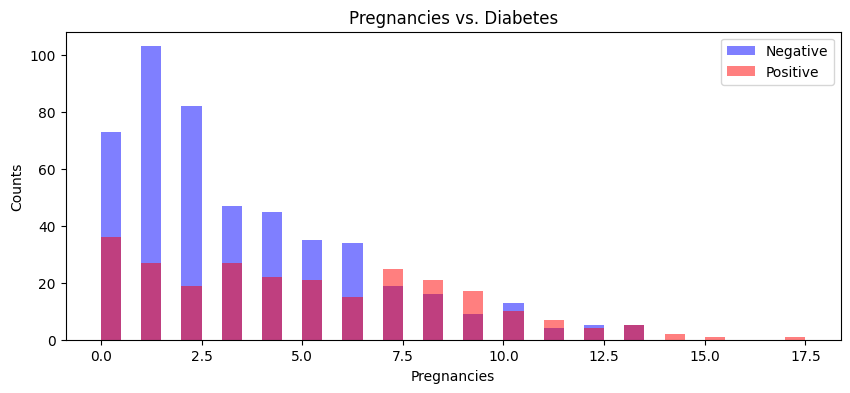

Postive:
Q1 (25th percentile): 2.0
Q2 (50th percentile - Median): 4.0
Q3 (75th percentile): 8.0
Negative:
Q1 (25th percentile): 1.0
Q2 (50th percentile - Median): 2.0
Q3 (75th percentile): 5.0


In [12]:
eda(data, "Pregnancies")   

From the quartile analysis, it can be observed that the majority of diabetes patients have a pregnancy history ranging from 2 to 8 times, which is notably higher compared to those without the condition, who typically have a history of one to five pregnancies.

Additionally, when 'Pregnancies' is greater than or equal to 7, the proportion of individuals with diabetes is significantly higher than those without the condition, often exceeding 50%.

count    750.000000
mean     121.553253
std       30.476753
min       44.000000
25%       99.000000
50%      117.000000
75%      140.989423
max      199.000000
Name: Glucose, dtype: float64


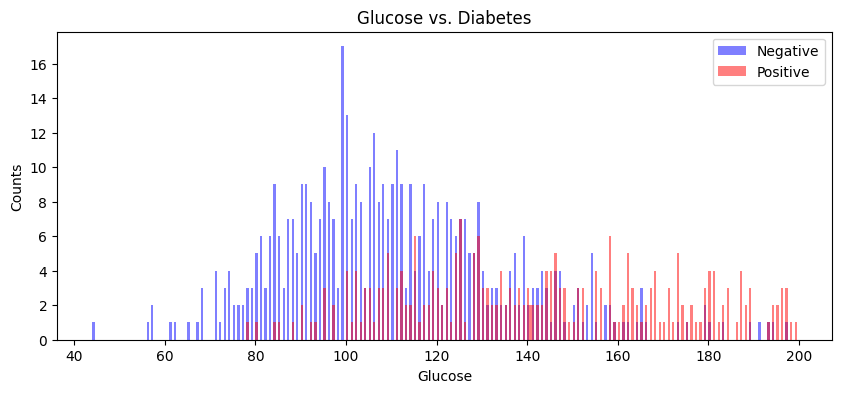

Postive:
Q1 (25th percentile): 119.0
Q2 (50th percentile - Median): 140.47884615384615
Q3 (75th percentile): 166.25
Negative:
Q1 (25th percentile): 93.25
Q2 (50th percentile - Median): 107.5
Q3 (75th percentile): 125.0


In [13]:
eda(data, "Glucose")   

From the quartile results of the samples among individuals with diabetes and those without, it becomes evident that following a two-hour oral glucose tolerance test, patients with diabetes generally exhibit notably higher plasma glucose concentration (mg/dl) levels when compared to those without diabetes. The majority of patients with diabetes have plasma glucose concentrations ranging from 119 to 166.25, while samples from those without diabetes typically range from 93.25 to 125.

Furthermore, it is worth noting that when the plasma glucose concentration exceeds 120, the likelihood of diabetes is approximately 50%.

count    750.000000
mean      72.214711
std       12.159133
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


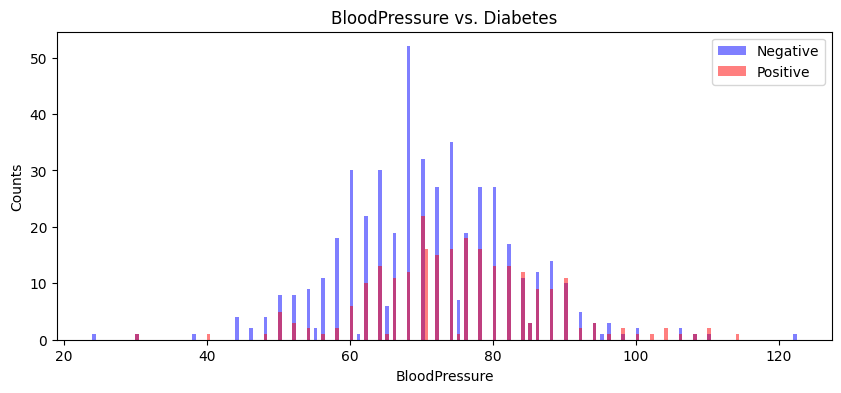

Postive:
Q1 (25th percentile): 68.0
Q2 (50th percentile - Median): 74.0
Q3 (75th percentile): 82.0
Negative:
Q1 (25th percentile): 64.0
Q2 (50th percentile - Median): 70.0
Q3 (75th percentile): 78.0


In [14]:
eda(data, "BloodPressure")   

Regarding blood pressure, most individuals with diabetes have blood pressure levels between 68 and 82. While the quartile comparison shows slightly higher blood pressure in those with diabetes, it's important to note that the majority of participants fall within the standard range of 64 to 80. As a result, it's visually challenging to establish a clear link between blood pressure and diabetes.

count    750.000000
mean      26.553920
std        9.655994
min        7.000000
25%       19.536735
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64


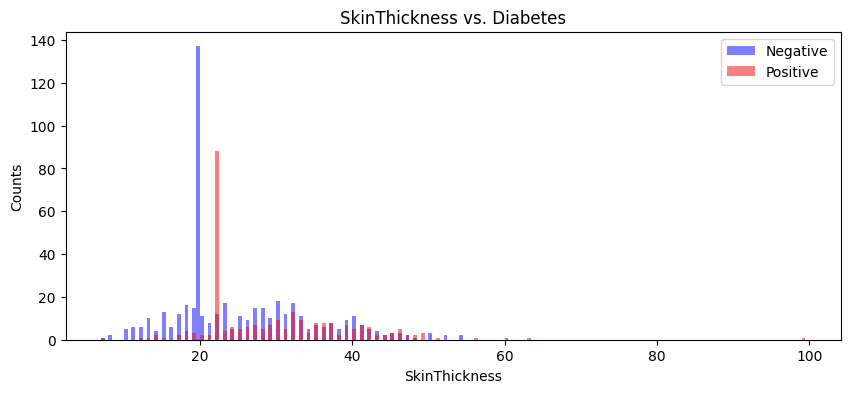

Postive:
Q1 (25th percentile): 22.284615384615385
Q2 (50th percentile - Median): 27.0
Q3 (75th percentile): 36.0
Negative:
Q1 (25th percentile): 19.536734693877552
Q2 (50th percentile - Median): 21.0
Q3 (75th percentile): 31.0


In [15]:
eda(data, "SkinThickness") 

Diabetes-positive individuals generally have thicker skin than diabetes-negative ones, with skin thickness ranging from approximately 22.28 to 36.

count    750.000000
mean     119.449109
std       93.222636
min       14.000000
25%       69.416327
50%      100.000000
75%      129.750000
max      846.000000
Name: Insulin, dtype: float64


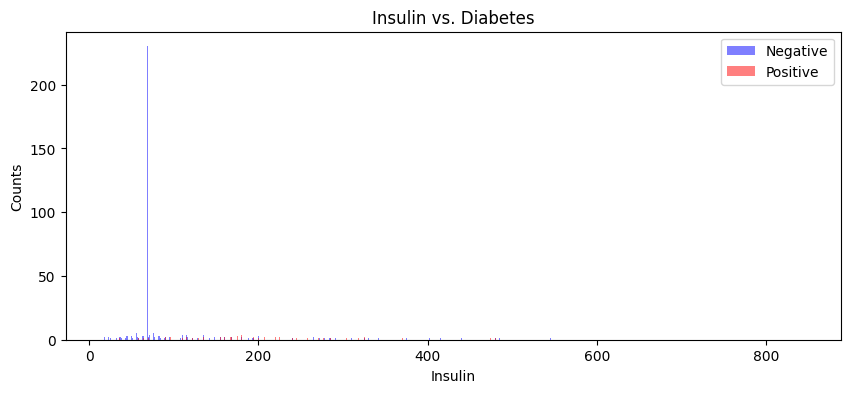

Postive:
Q1 (25th percentile): 101.03846153846153
Q2 (50th percentile - Median): 101.03846153846153
Q3 (75th percentile): 168.0
Negative:
Q1 (25th percentile): 69.41632653061224
Q2 (50th percentile - Median): 69.41632653061224
Q3 (75th percentile): 105.0


In [16]:
eda(data, "Insulin") 

Healthy individuals have an Insulin level of around 69. Most cases with Insulin levels exceeding 74 are diabetes patients. Furthermore, the majority of individuals with diabetes have an Insulin value of approximately 101.

count    750.000000
mean      32.416135
std        6.906108
min       18.200000
25%       27.500000
50%       32.000000
75%       36.575000
max       67.100000
Name: BMI, dtype: float64


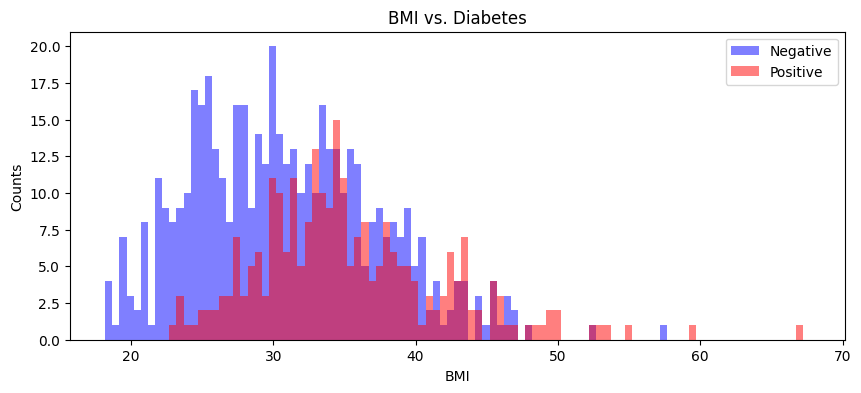

Postive:
Q1 (25th percentile): 30.875
Q2 (50th percentile - Median): 34.3
Q3 (75th percentile): 38.775000000000006
Negative:
Q1 (25th percentile): 25.6
Q2 (50th percentile - Median): 30.2865306122449
Q3 (75th percentile): 35.275


In [17]:
eda(data, "BMI") 

From the BMI data, it's evident that samples with lower BMI values are predominantly negative for diabetes. However, starting from a BMI greater than 30, over 40% of participants have positive diabetes test results. This proportion increases significantly for individuals with a BMI greater than 48, where all participants are diabetes patients. Moreover, most diabetes patients have BMI values ranging from 30.875 to 38.775.

count    750.000000
mean       0.473544
std        0.332119
min        0.078000
25%        0.244000
50%        0.377000
75%        0.628500
max        2.420000
Name: DiabetesPedigree, dtype: float64


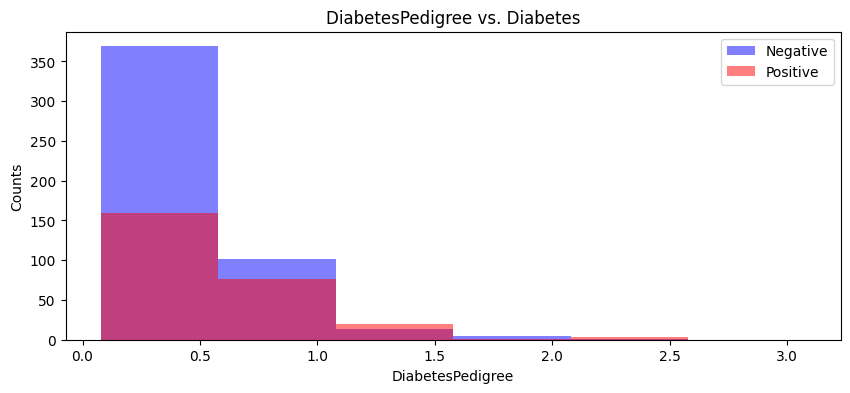

Postive:
Q1 (25th percentile): 0.2625
Q2 (50th percentile - Median): 0.4535
Q3 (75th percentile): 0.728
Negative:
Q1 (25th percentile): 0.231
Q2 (50th percentile - Median): 0.3375
Q3 (75th percentile): 0.5692499999999999


In [18]:
eda(data, "DiabetesPedigree") 

While the values of DiabetesPedigree are relatively small, differences are less apparent. Nevertheless, it's noteworthy that a value greater than 0.56 is associated with an extremely high diabetes prevalence.

count    750.000000
mean      33.166667
std       11.708872
min       21.000000
25%       24.000000
50%       29.000000
75%       40.750000
max       81.000000
Name: Age, dtype: float64


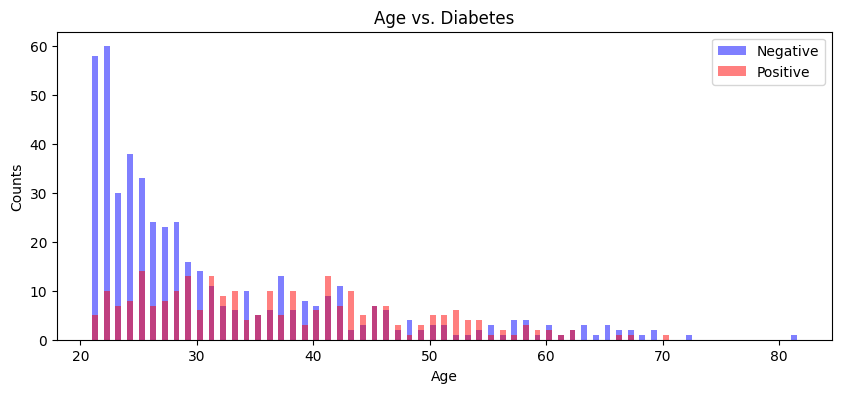

Postive:
Q1 (25th percentile): 28.0
Q2 (50th percentile - Median): 36.0
Q3 (75th percentile): 44.0
Negative:
Q1 (25th percentile): 23.0
Q2 (50th percentile - Median): 27.0
Q3 (75th percentile): 37.0


In [19]:
eda(data, "Age") 

In this dataset, most participants are aged between 20 and 30 years, indicating that the age distribution isn't uniformly spread for prevalence interpretation. However, the data shows a consistent number of diabetes cases across different age groups, with the majority of diabetes patients falling between the ages of 28 and 44 years.


## Summary of EDA finding
**Pregnancy History:**

- Most diabetes patients had pregnancies ranging from 2 to 8 times, higher than those without diabetes (1 to 5 pregnancies).

- **High Risk:** When 'Pregnancies' is greater than or equal to 7, diabetes prevalence exceeds 50%.

**Plasma Glucose Concentration:**

- Diabetes patients have higher plasma glucose levels (119 to 166.25) compared to non-diabetic individuals (93.25 to 125).

- **Threshold:** When plasma glucose exceeds 120, the likelihood of diabetes is around 50%.

**Blood Pressure:**

- Most diabetics have blood pressure between 68 and 82, but many participants fall within the standard range of 64 to 80.

- **Inconclusive:** Establishing a clear link between blood pressure and diabetes is visually challenging.

**Skin Thickness:**

- Diabetics generally have thicker skin (22.28 to 36).

- **High Proportion:** A significant number of diabetics have 'SkinThickness' in the 22.0 to 44.5 range.

**Insulin Levels:**

- Healthy individuals have an Insulin level of around 69.

- **Diabetes Indicator:** High Insulin levels (>74) often indicate diabetes.

**BMI (Body Mass Index):**

- Lower BMI values are mostly associated with non-diabetic cases.

- **High Risk:** BMI > 30 indicates over 40% likelihood of diabetes, increasing to 100% with BMI > 48.

- **Common Range:** Most diabetes patients have BMI between 30.875 and 38.775.

**DiabetesPedigree:**

- Values are relatively small and less distinct.

- **High Risk:** Values greater than 0.56 indicate an extremely high diabetes prevalence.

**Age:**

- Participants aged 20 to 30 dominate the dataset.

- **Consistent Diabetes Cases:** Diabetes cases are consistent across different age groups, with the majority aged 28 to 44.


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Initialize values to 0.
data['SevenOrMorePregnancies'] = 0  
# Set the value to 1 for rows when meet data['Pregnancies'] >= 7.
data.loc[data['Pregnancies'] >= 7, 'SevenOrMorePregnancies'] = 1 

# Split the data into a training set and a testing set
X = data[['SevenOrMorePregnancies']]
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


# Calculate the probability of diabetes
# [0] means data['SevenOrMorePregnancies'] == 0 (< 7 children)
# Probability with 0 or 6 children
prob_0 = model.predict_proba(pd.DataFrame([0]))[0, 1]  
# [1] means data['SevenOrMorePregnancies'] == 1 (>= 7 children)
# Probability with 7 or more children
prob_1 = model.predict_proba(pd.DataFrame([1]))[0, 1]  

print(f"Probability of diabetes with 0 to 6 children:\t{prob_0:.2f}")
print(f"Probability of diabetes with 7 or more children:{prob_1:.2f}")

Probability of diabetes with 0 to 6 children:	0.29
Probability of diabetes with 7 or more children:0.58


D:\anaconda\envs\envs_notebook\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
D:\anaconda\envs\envs_notebook\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


The EDA analysis highlights 7 as a crucial threshold for diabetes outcomes. Using logistic regression, we found that the probability of diabetes with 7 or more children is 0.58, while it's only 0.29 for 0 to 6 children.

In [21]:
from sklearn.model_selection import train_test_split
y = data["Outcome"]
X = data.drop(["Outcome", "SevenOrMorePregnancies"] , axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy：{accuracy:.2f}")


Logistic Regression Accuracy：0.77


D:\anaconda\envs\envs_notebook\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Logistic Regression** 
- It is a well-suited choice for binary classification tasks like predicting diabetes, thanks to its simplicity and interpretability.


In [23]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")

Decision Tree Classifier Accuracy: 0.87


**Decision Tree Classifier** 
- It is selected for its ability to handle non-linear relationships within the data and provide a transparent decision-making process.

In [24]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_model, out_file=None, 
                           feature_names=X.columns, 
                           filled=True, rounded=True,
                           class_names=["Negative", "Positive"],
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  
graph.view() 


'decision_tree.pdf'

In [25]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

y_pred = forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")


Random Forest Classifier Accuracy: 0.85


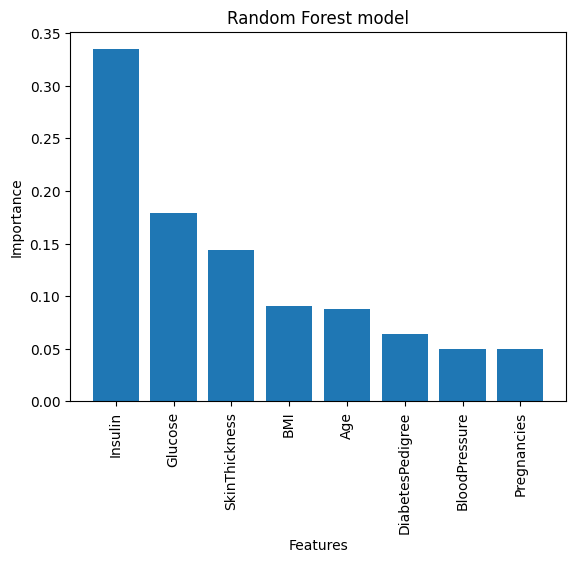

In [26]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


# Get feature importances
feature_importances = forest_model.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Get the names of the features
feature_names = X.columns

# Plot all features
N = 8
plt.bar(range(N), feature_importances[sorted_idx][:N])
plt.xticks(range(N), [feature_names[i] for i in sorted_idx][:N], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest model'.format(N))
plt.show()


In [27]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 12 
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(X_train, y_train)

y_pred = KNN_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Classifier Accuracy：{accuracy:.2f}")


KNN Classifier Accuracy：0.88


In [28]:
X_test.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigree',
 'Age']

In [29]:
# load ToPredict.csv
predict_data = pd.read_csv("ToPredict.csv")
predict_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,4,136,70,0,0,31.2,1.182,22
1,1,121,78,39,74,39.0,0.261,28
2,3,108,62,24,0,26.0,0.223,25
3,0,181,88,44,510,43.3,0.222,26
4,8,154,78,32,0,32.4,0.443,45


In [30]:
print("Logistic Regression:\t\t\t", log_model.predict(predict_data))
print("Decision Tree Classifier Accuracy：\t", tree_model.predict(predict_data))
print("Random Forest Classifier:\t\t", forest_model.predict(predict_data))
print("KNN Classifier:\t\t\t\t", KNN_model.predict(predict_data))

Logistic Regression:			 [0 0 0 1 1]
Decision Tree Classifier Accuracy：	 [1 0 0 1 0]
Random Forest Classifier:		 [0 0 0 1 0]
KNN Classifier:				 [0 0 0 1 0]


It is obvious that **[0 0 0 1 0]** is the highest probability prediction of ToPredict.csv


In [31]:
predict_data["Outcome"] =  KNN_model.predict(predict_data)
predict_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,4,136,70,0,0,31.2,1.182,22,0
1,1,121,78,39,74,39.0,0.261,28,0
2,3,108,62,24,0,26.0,0.223,25,0
3,0,181,88,44,510,43.3,0.222,26,1
4,8,154,78,32,0,32.4,0.443,45,0
